In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import pyplot

import seaborn as sns

import plotly.graph_objects as go

import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# **Loading the dataset from Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link_countries = 'https://drive.google.com/open?id=1NaBcOPI5pIMZCuBeT0kdz_t3gSmY3cgb'


In [0]:

fluff, id = link_countries.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Women_In_Parliament_Countries_Filtered.csv')  
countries = pd.read_csv('Women_In_Parliament_Countries_Filtered.csv', engine = 'python')

1NaBcOPI5pIMZCuBeT0kdz_t3gSmY3cgb


In [0]:
countries.head()

,Region,Country,Year,Percentage,Unnamed: 4
0,4,Afghanistan,1990,3.7,NaN
1,4,Afghanistan,2010,27.3,NaN
2,4,Afghanistan,2015,27.7,NaN
3,4,Afghanistan,2016,27.7,NaN
4,4,Afghanistan,2017,27.7,NaN


In [0]:
countriess = countries.drop(['Unnamed: 4'], axis=1)

In [0]:
countriess.head()

,Region,Country,Year,Percentage
0,4,Afghanistan,1990,3.7
1,4,Afghanistan,2010,27.3
2,4,Afghanistan,2015,27.7
3,4,Afghanistan,2016,27.7
4,4,Afghanistan,2017,27.7


## Formatting the Countries file into time-series

In [0]:
Years = np.sort(countries['Year'].unique()) 
print(Years)

[1990 2000 2005 2010 2015 2016 2017 2018 2019]


In [0]:
Countries = countries['Country'].unique()

In [0]:
cols = ['Country']
for i in Years:
  cols.append(str(i))

cols

['Country',
 '1990',
 '2000',
 '2005',
 '2010',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [0]:
n_countries = len(Countries)
i= 0

df = pd.DataFrame(columns = cols)

for country in Countries:
  roww = []
  roww.append(country)
  for year in Years:
    x = countries.loc[(countries['Country'] == country) & (countries['Year'] == int(year))].Percentage
    if  x.shape[0] == 0:
      roww.append('NaN')
    else:
      x
      roww.append(x.iloc[0])
  print(roww)
  df.loc[i] = roww
  i = i+1
 


['Afghanistan', 3.7, 'NaN', 'NaN', 27.3, 27.7, 27.7, 27.7, 27.7, 'NaN']
['Albania', 28.8, 5.2, 6.4, 16.4, 20.7, 20.7, 22.9, 27.9, 29.29]
['Algeria', 2.4, 3.2, 6.2, 7.7, 31.6, 31.6, 31.6, 25.8, 25.76]
['Andorra', 'NaN', 7.1, 14.3, 35.7, 50.0, 39.3, 32.1, 32.1, 32.14]
['Angola', 14.5, 15.5, 15.0, 38.6, 36.8, 36.8, 38.2, 30.5, 30.0]
['Antigua and Barbuda', 0.0, 'NaN', 10.5, 10.5, 11.1, 11.1, 11.1, 11.1, 11.11]
['Argentina', 6.3, 28.0, 33.7, 38.5, 36.2, 35.8, 38.9, 38.9, 38.82]
['Armenia', 35.6, 3.1, 5.3, 9.2, 10.7, 10.7, 9.9, 18.1, 24.24]
['Australia', 6.1, 22.4, 24.7, 27.3, 26.7, 26.7, 28.7, 28.7, 30.0]
['Austria', 11.5, 26.8, 33.9, 27.9, 30.6, 30.6, 30.6, 34.4, 37.16]
['Azerbaijan', 'NaN', 12.0, 10.5, 11.4, 15.6, 16.9, 16.8, 16.8, 16.81]
['Bahamas', 4.1, 15.0, 20.0, 12.2, 13.2, 13.2, 13.2, 12.8, 12.82]
['Bahrain', 'NaN', 'NaN', 0.0, 2.5, 7.5, 7.5, 7.5, 7.5, 15.0]
['Bangladesh', 10.3, 9.1, 2.0, 18.6, 20.0, 20.0, 20.3, 20.3, 20.69]
['Barbados', 3.7, 10.7, 13.3, 10.0, 16.7, 16.7, 16.7, 16.

In [0]:
df.head()
#df.to_csv('Women_In_Parliament_Countries_Time_Series.csv')

,Country,1990,2000,2005,2010,2015,2016,2017,2018,2019
0,Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,NaN
1,Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29
2,Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76
3,Andorra,NaN,7.1,14.3,35.7,50,39.3,32.1,32.1,32.14
4,Angola,14.5,15.5,15,38.6,36.8,36.8,38.2,30.5,30


In [0]:
countries_time_series = df

In [0]:
countries_time_series_numeric = countries_time_series.set_index(countries_time_series['Country']).drop(columns = ['Country']).replace('NaN',np.nan).apply(pd.to_numeric)
countries_time_series_numeric

,1990,2000,2005,2010,2015,2016,2017,2018,2019
Country,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,NaN
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00
...,...,...,...,...,...,...,...,...,...
Venezuela (Boliv. Rep. of),10.0,12.1,9.7,17.5,17.0,14.4,22.2,22.2,22.16
Viet Nam,17.7,26.0,27.3,25.8,24.3,24.3,26.7,26.7,26.72
Yemen,4.1,0.7,0.3,0.3,0.3,0.0,0.0,0.0,0.33


In [0]:
# ---------------------------------------------------------------   Filling Nulls in 2019 --------------------------------------------------------------------------------------------
N_Rows = countries_time_series_numeric.shape[0]

for i in range(0,N_Rows):
  if np.isnan(countries_time_series_numeric.iloc[i,-1]):
    countries_time_series_numeric.iloc[i,-1] = countries_time_series_numeric.iloc[i,-2]

In [0]:
countries_time_series_numeric.isnull().sum()

1990    58
2000    34
2005    14
2010     8
2015     6
2016     4
2017     2
2018     3
2019     2
dtype: int64

In [0]:
countries_time_series_numeric.loc[countries_time_series_numeric['2019'].isnull()]

,1990,2000,2005,2010,2015,2016,2017,2018,2019
Country,,,,,,,,,
Serbia and Monten. [former],NaN,5.1,7.9,NaN,NaN,NaN,NaN,NaN,NaN
Sudan [former],NaN,NaN,9.7,18.9,NaN,NaN,NaN,NaN,NaN


In [0]:
countries_time_series_numeric
countries_time_series_numeric = countries_time_series_numeric[~countries_time_series_numeric['2019'].isnull()]

In [0]:
countries_time_series_numeric.isnull().sum()

1990    56
2000    33
2005    14
2010     7
2015     4
2016     2
2017     0
2018     1
2019     0
dtype: int64

In [0]:
countries_time_series_numeric.shape

(193, 9)

In [0]:
countries_time_series_numeric.to_csv('countries_time_series_complete.csv')

# Loading and Formatting the Continents csv

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link_continents = 'https://drive.google.com/open?id=197qFWt4u7ltiEbN8jvvfaDr94HuLgtc3'


In [0]:
fluff1, id1 = link_continents.split('=')
print (id) # Verify that you have everything after '='

downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('Women_In_Parliament_Continent_Filtered.csv')  
continents = pd.read_csv('Women_In_Parliament_Continent_Filtered.csv')

1NaBcOPI5pIMZCuBeT0kdz_t3gSmY3cgb


In [0]:
continents.head()

,Region,Continent,Year,Value
0,1,"Total, all countries or areas",2000,13.3396
1,1,"Total, all countries or areas",2005,15.9373
2,1,"Total, all countries or areas",2010,19.0306
3,1,"Total, all countries or areas",2015,22.2732
4,1,"Total, all countries or areas",2016,22.7371


In [0]:
continents['Percentage'] = continents['Value']
continentss = continents.drop(['Value'], axis = 1)

In [0]:
continentss.head()

,Region,Continent,Year,Percentage
0,1,"Total, all countries or areas",2000,13.3396
1,1,"Total, all countries or areas",2005,15.9373
2,1,"Total, all countries or areas",2010,19.0306
3,1,"Total, all countries or areas",2015,22.2732
4,1,"Total, all countries or areas",2016,22.7371


In [0]:
Years = np.sort(continentss['Year'].unique()) 
print(Years)
  

[2000 2005 2010 2015 2016 2017 2018 2019]


In [0]:
Continents = continentss['Continent'].unique()

In [0]:
Continents

array(['Total, all countries or areas', 'Africa', 'Northern Africa',
       'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Latin America & the Caribbean', 'Caribbean',
       'Central America', 'South America', 'Asia', 'Central Asia',
       'Eastern Asia', 'South-eastern Asia', 'Southern Asia',
       'Western Asia', 'Europe', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Western Europe', 'Oceania',
       'Australia and New Zealand', 'Melanesia', 'Micronesia',
       'Polynesia'], dtype=object)

In [0]:
cols = ['Continent']
for i in Years:
  cols.append(str(i))

cols

['Continent', '2000', '2005', '2010', '2015', '2016', '2017', '2018', '2019']

In [0]:
n_Continents = len(Continents)
i= 0

df = pd.DataFrame(columns = cols)

for continent in Continents:
  roww = []
  roww.append(continent)
  for year in Years:
    x = continentss.loc[(continentss['Continent'] == continent) & (continentss['Year'] == int(year))].Percentage
    if  x.shape[0] == 0:
      roww.append('NaN')
    else:
      x
      roww.append(x.iloc[0])
  print(roww)
  df.loc[i] = roww
  i = i+1


['Total, all countries or areas', 13.3396, 15.9373, 19.0306, 22.2732, 22.7371, 23.3881, 23.4288, 24.2981]
['Africa', 10.4459, 13.9041, 17.3825, 22.9575, 23.2571, 23.7461, 23.4347, 23.6237]
['Northern Africa', 4.5376, 8.7362, 10.9416, 21.9711, 23.2049, 23.8179, 22.6357, 22.6593]
['Sub-Saharan Africa', 11.5237, 14.4434, 18.3981, 22.6417, 23.2714, 23.7273, 23.6443, 23.8813]
['Eastern Africa', 11.8943, 16.5918, 21.593000000000004, 27.1855, 28.8517, 29.695, 29.9949, 30.2232]
['Middle Africa', 8.61, 11.2483, 13.4652, 18.1087, 18.1087, 17.4447, 16.4334, 17.0239]
['Southern Africa', 22.4736, 24.5833, 33.3799, 33.3777, 33.3777, 33.4225, 33.6898, 34.0454]
['Western Africa', 8.1695, 10.2011, 11.5598, 14.4514, 13.9535, 14.8782, 14.8368, 14.8055]
['Americas', 15.3545, 18.7783, 22.1413, 26.5413, 27.2837, 28.3041, 28.4666, 30.5896]
['Northern America', 16.3043, 17.4966, 18.9771, 21.7568, 22.2798, 22.2078, 22.7865, 25.0326]
['Latin America & the Caribbean', 15.1846, 19.0095, 22.7013, 27.3829, 28.1991,

In [0]:
df

,Continent,2000,2005,2010,2015,2016,2017,2018,2019
0,"Total, all countries or areas",13.3396,15.9373,19.0306,22.2732,22.7371,23.3881,23.4288,24.2981
1,Africa,10.4459,13.9041,17.3825,22.9575,23.2571,23.7461,23.4347,23.6237
2,Northern Africa,4.5376,8.7362,10.9416,21.9711,23.2049,23.8179,22.6357,22.6593
3,Sub-Saharan Africa,11.5237,14.4434,18.3981,22.6417,23.2714,23.7273,23.6443,23.8813
4,Eastern Africa,11.8943,16.5918,21.5930,27.1855,28.8517,29.6950,29.9949,30.2232
5,Middle Africa,8.6100,11.2483,13.4652,18.1087,18.1087,17.4447,16.4334,17.0239
6,Southern Africa,22.4736,24.5833,33.3799,33.3777,33.3777,33.4225,33.6898,34.0454
7,Western Africa,8.1695,10.2011,11.5598,14.4514,13.9535,14.8782,14.8368,14.8055
8,Americas,15.3545,18.7783,22.1413,26.5413,27.2837,28.3041,28.4666,30.5896
9,Northern America,16.3043,17.4966,18.9771,21.7568,22.2798,22.2078,22.7865,25.0326


In [0]:
continents_time_series = df

In [0]:
continents_time_series.to_csv('Women_In_Parliament_Continents_Time_Series.csv')

# Analyzing Continents

## Checking the patterns through the years in the continents

In [0]:


main_continents = continents_time_series.loc[(continents_time_series['Continent'].isin(['Africa','Americas','Asia','Europe','Australia and New Zealand']))]

In [0]:
main_continents

,Continent,2000,2005,2010,2015,2016,2017,2018,2019
1,Africa,10.4459,13.9041,17.3825,22.9575,23.2571,23.7461,23.4347,23.6237
8,Americas,15.3545,18.7783,22.1413,26.5413,27.2837,28.3041,28.4666,30.5896
14,Asia,12.0766,13.3688,16.8335,17.8047,17.9493,18.4092,17.9048,18.7629
20,Europe,16.7859,20.4998,23.2497,26.7163,27.1527,28.0193,28.8742,29.7997
26,Australia and New Zealand,25.4682,26.2963,30.1471,28.7823,28.7823,31.1111,32.9630,34.4444


In [0]:
main_continents = main_continents.set_index(main_continents['Continent'])
main_continents = main_continents.drop(columns=['Continent'])
main_continents



,2000,2005,2010,2015,2016,2017,2018,2019
Continent,,,,,,,,
Africa,10.4459,13.9041,17.3825,22.9575,23.2571,23.7461,23.4347,23.6237
Americas,15.3545,18.7783,22.1413,26.5413,27.2837,28.3041,28.4666,30.5896
Asia,12.0766,13.3688,16.8335,17.8047,17.9493,18.4092,17.9048,18.7629
Europe,16.7859,20.4998,23.2497,26.7163,27.1527,28.0193,28.8742,29.7997
Australia and New Zealand,25.4682,26.2963,30.1471,28.7823,28.7823,31.1111,32.9630,34.4444


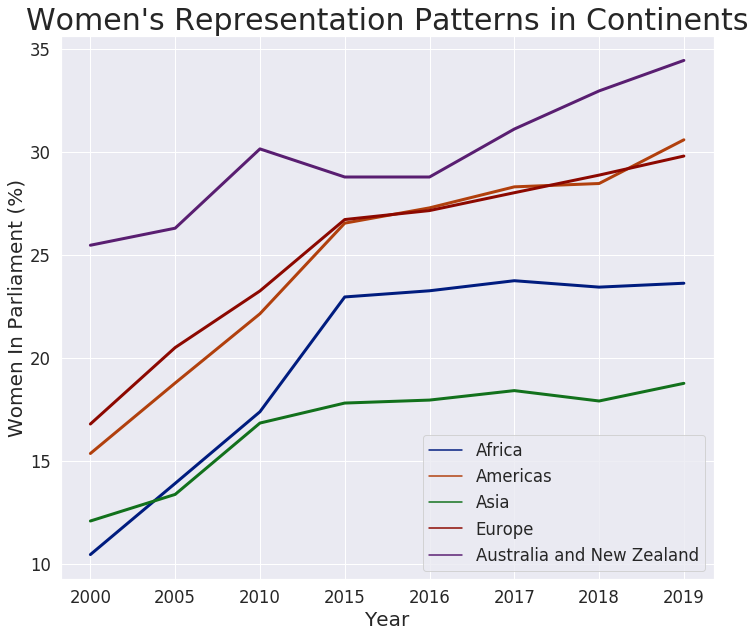

In [0]:
a4_dims = (11.7, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style = "darkgrid", font_scale=1.5)
ax = sns.lineplot(data=main_continents.transpose(), dashes = False, palette = "dark", lw = 3)
ax.axes.set_title("Women's Representation Patterns in Continents",fontsize=30)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Women In Parliament (%)",fontsize=20)

fig.savefig('Patterns_Continents.jpg')

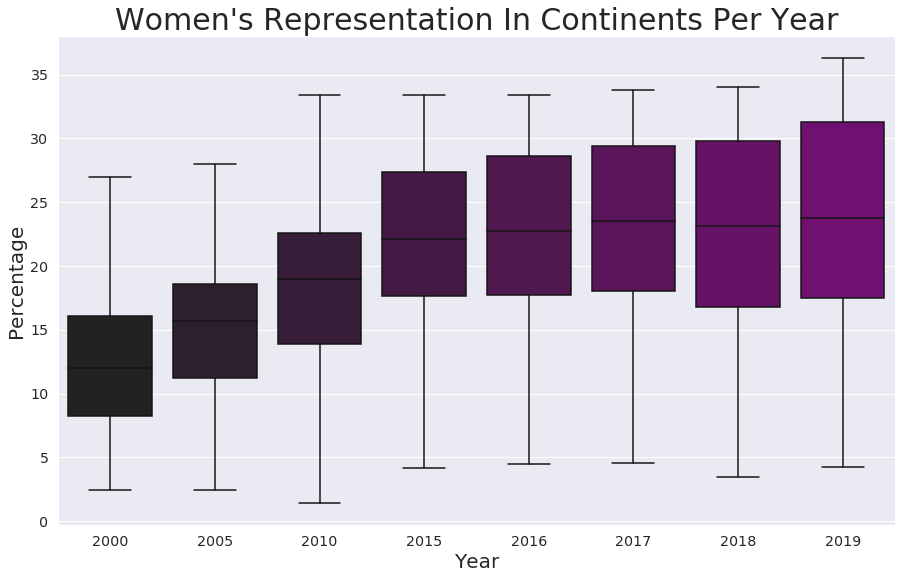

In [0]:
a4_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.6)

ax = sns.boxplot(data=continents_time_series.drop(columns = ['Continent']), palette = sns.dark_palette("purple", 8))
ax.axes.set_title("Women's Representation In Continents Per Year",fontsize=30)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Percentage",fontsize=20)

fig.savefig('Box_Plots_Continents.jpg')

## Clustering the Continents

In [0]:
sub_continents = continents_time_series[~continents_time_series['Continent'].isin(['Africa','Americas','Asia','Europe','Australia and New Zealand','Total, all countries or areas'])]

In [0]:
sub_continents['Continent']

2                   Northern Africa
3                Sub-Saharan Africa
4                    Eastern Africa
5                     Middle Africa
6                   Southern Africa
7                    Western Africa
9                  Northern America
10    Latin America & the Caribbean
11                        Caribbean
12                  Central America
13                    South America
15                     Central Asia
16                     Eastern Asia
17               South-eastern Asia
18                    Southern Asia
19                     Western Asia
21                   Eastern Europe
22                  Northern Europe
23                  Southern Europe
24                   Western Europe
25                          Oceania
27                        Melanesia
28                       Micronesia
29                        Polynesia
Name: Continent, dtype: object

In [0]:
sub_continents['Continent'].shape

(24,)

In [0]:

#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(sub_continents.drop(columns=['Continent']))
print(y_kmeans5)

[4 4 3 1 0 1 4 3 0 3 4 4 4 4 1 1 4 0 3 0 1 2 2 2]


In [0]:
y_kmeans5.shape

(24,)

In [0]:
sub_continents['Cluster'] = y_kmeans5
sub_conts_clustering = sub_continents.sort_values(by = 'Cluster')

In [0]:
sub_continents.shape

(24, 10)

In [0]:
sub_conts_clustering.to_csv('sub_continents_clustering.csv')

In [0]:
sub_conts_clustering.head()

,Continent,2000,2005,2010,2015,2016,2017,2018,2019,Cluster
6,Southern Africa,22.4736,24.5833,33.3799,33.3777,33.3777,33.4225,33.6898,34.0454,0
11,Caribbean,20.5909,25.9752,29.4068,33.1081,33.0229,33.8005,33.7449,36.0927,0
24,Western Europe,23.0315,25.8261,28.4422,32.0000,32.1500,32.1161,34.0231,34.2156,0
22,Northern Europe,26.9939,28.0264,29.5788,30.4060,32.4835,33.3175,33.7915,35.1185,0
5,Middle Africa,8.6100,11.2483,13.4652,18.1087,18.1087,17.4447,16.4334,17.0239,1


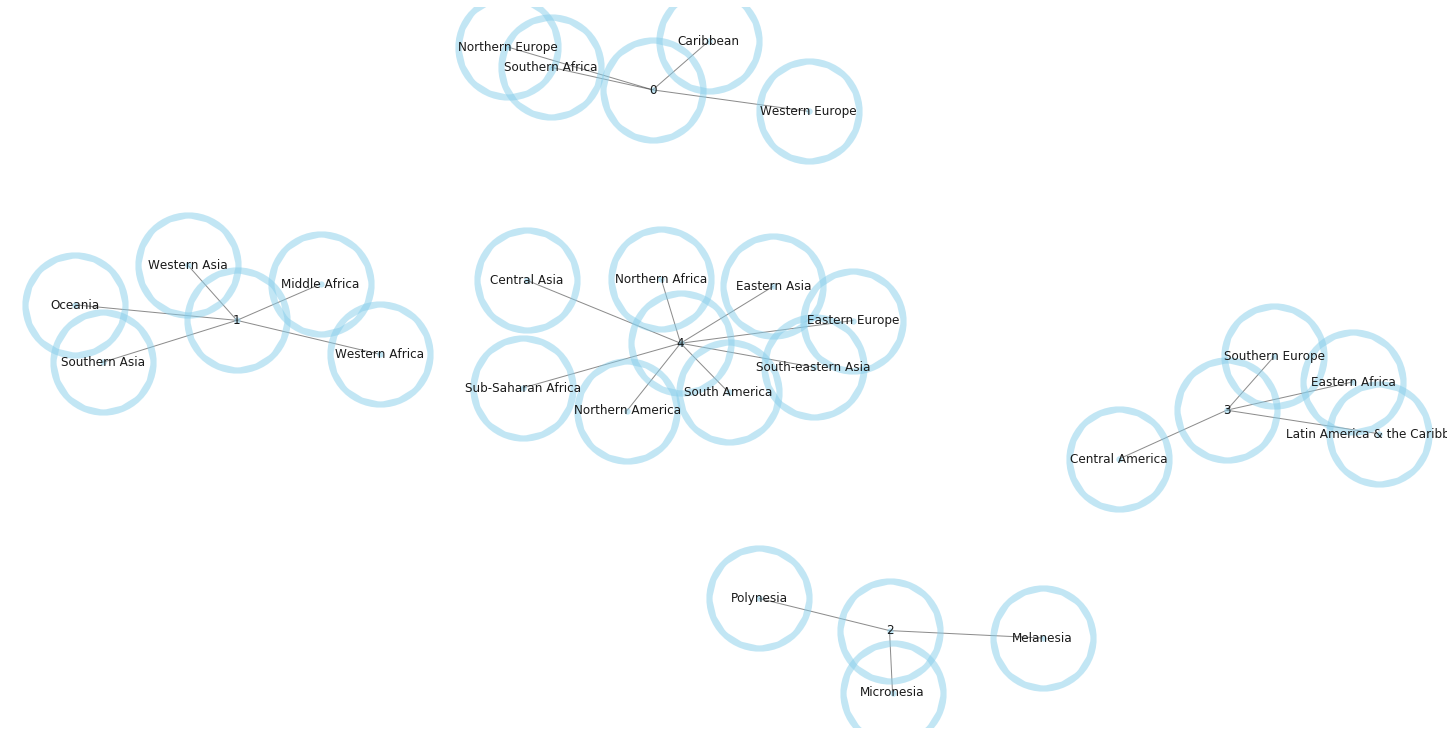

In [0]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



f = plt.figure(figsize=(20,10)) 

df = pd.DataFrame()
df['To'] = sub_conts_clustering['Continent']
df['From'] = sub_conts_clustering['Cluster']

# Build your graph
G=nx.from_pandas_edgelist(df, 'From', 'To')
 
# Graph with Custom nodes:
pos = nx.spring_layout(g, k=0.3*1/np.sqrt(25), iterations=10)
nx.draw(G,pos=pos,node_size=40, font_size = 15, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=100)
nx.draw_networkx_labels(G, pos=pos)
#nx.draw(G,, node_size=700, font_size = 15, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=100, pos = po1s)
f.savefig("Clusters.jpg", bbox_inches = 'tight')

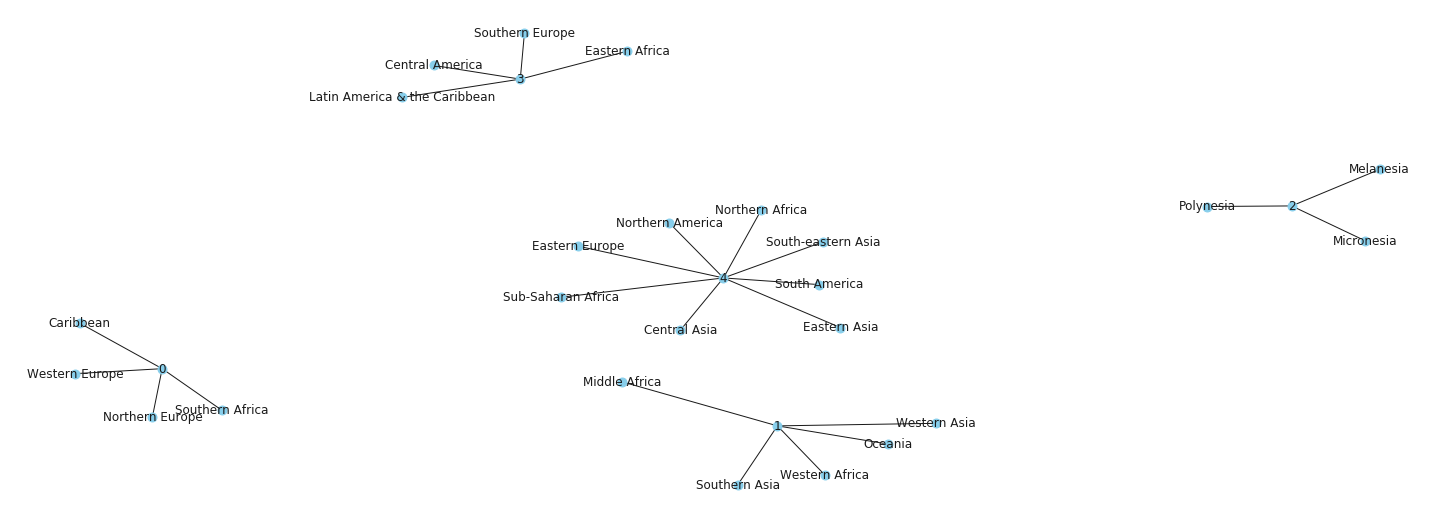

In [0]:
#f = plt.figure(figsize=(15,6)) 

df = pd.DataFrame()
df['To'] = sub_conts_clustering['Continent']
df['From'] = sub_conts_clustering['Cluster']

# Build your graph
g=nx.from_pandas_edgelist(df, 'From', 'To')

pos = nx.spring_layout(g, k=0.3*1/np.sqrt(25), iterations=10)
plt.figure(3, figsize=(20, 7))
nx.draw(g, pos=pos, node_size=80, font_size = 15, node_color="skyblue", node_shape="o")
nx.draw_networkx_labels(g, pos=pos)
plt.show()

# Analyzing Countries

In [0]:
countries_time_series = countries_time_series_numeric

In [0]:
countries_time_series.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019
Country,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00


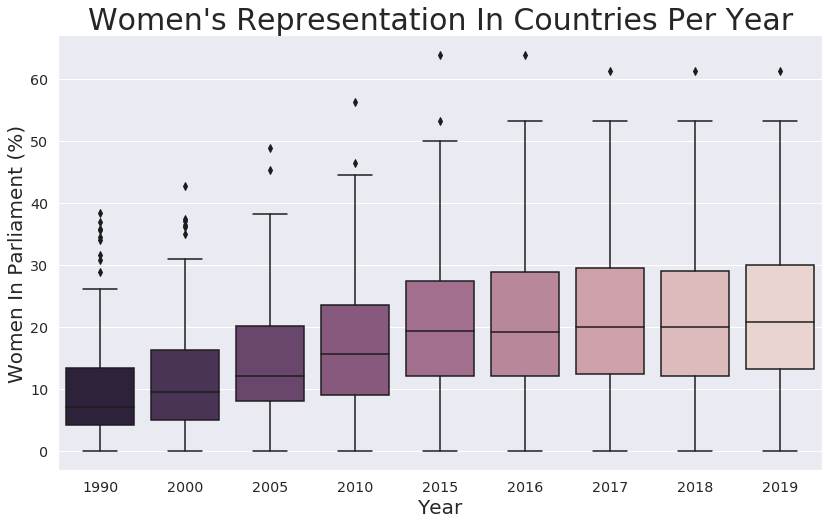

In [0]:
a4_dims = (13.7, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.3)
ax = sns.boxplot(data=countries_time_series, palette=sns.cubehelix_palette(9, reverse = True))
ax.axes.set_title("Women's Representation In Countries Per Year",fontsize=30)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Women In Parliament (%)",fontsize=20)

fig.savefig('Box_Plots_Countries.jpg')

## Checking out Statistics per each country

In [0]:
countries_time_series_numeric.transpose().describe().transpose().to_csv('Countries_Describe.csv')

In [0]:
countries_describe = countries_time_series_numeric.transpose().describe().transpose()
countries_describe.head()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Afghanistan,7.0,24.214286,9.047178,3.7,27.50,27.70,27.7,27.70
Albania,9.0,19.810000,9.028976,5.2,16.40,20.70,27.9,29.29
Algeria,9.0,18.428889,13.143497,2.4,6.20,25.76,31.6,31.60
Andorra,8.0,30.342500,13.639968,7.1,27.65,32.12,36.6,50.00
Angola,9.0,28.433333,10.531738,14.5,15.50,30.50,36.8,38.60


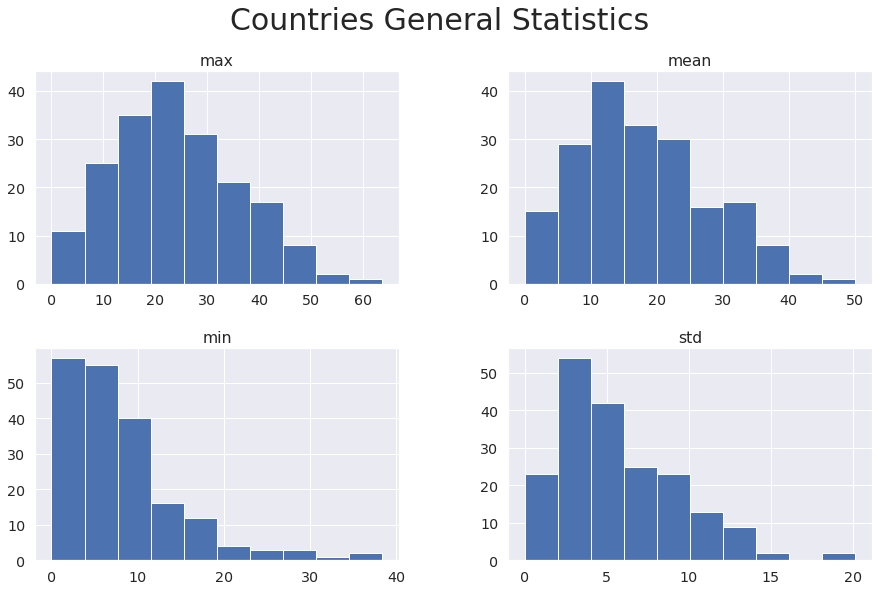

In [0]:
countries_describe.drop(columns = ['count', '25%','50%','75%']).hist(figsize=(15,9))
plt.suptitle("Countries General Statistics", fontsize = 30)
plt.savefig("Countries_Desc.jpg")

In [0]:
countries_time_series_numeric.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019
Country,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00


In [0]:
countries_series_and_desc = pd.concat([countries_time_series_numeric, countries_describe], axis=1)

In [0]:
countries_series_and_desc.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70,7.0,24.214286,9.047178,3.7,27.50,27.70,27.7,27.70
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29,9.0,19.810000,9.028976,5.2,16.40,20.70,27.9,29.29
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76,9.0,18.428889,13.143497,2.4,6.20,25.76,31.6,31.60
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14,8.0,30.342500,13.639968,7.1,27.65,32.12,36.6,50.00
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00,9.0,28.433333,10.531738,14.5,15.50,30.50,36.8,38.60


## Differences in percentage


### Biggest Difference

In [0]:
countries_series_and_desc['diff_10_yrs'] = countries_series_and_desc['2019'] - countries_series_and_desc['2010']
countries_series_and_desc['diff_20_yrs'] = countries_series_and_desc['2019'] - countries_series_and_desc['2000']
countries_series_and_desc['diff_30_yrs'] = countries_series_and_desc['2019'] - countries_series_and_desc['1990']


In [0]:
countries_series_and_desc.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019,count,mean,std,min,25%,50%,75%,max,diff_10_yrs,diff_20_yrs,diff_30_yrs
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70,7.0,24.214286,9.047178,3.7,27.50,27.70,27.7,27.70,0.40,NaN,24.00
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29,9.0,19.810000,9.028976,5.2,16.40,20.70,27.9,29.29,12.89,24.09,0.49
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76,9.0,18.428889,13.143497,2.4,6.20,25.76,31.6,31.60,18.06,22.56,23.36
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14,8.0,30.342500,13.639968,7.1,27.65,32.12,36.6,50.00,-3.56,25.04,NaN
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00,9.0,28.433333,10.531738,14.5,15.50,30.50,36.8,38.60,-8.60,14.50,15.50


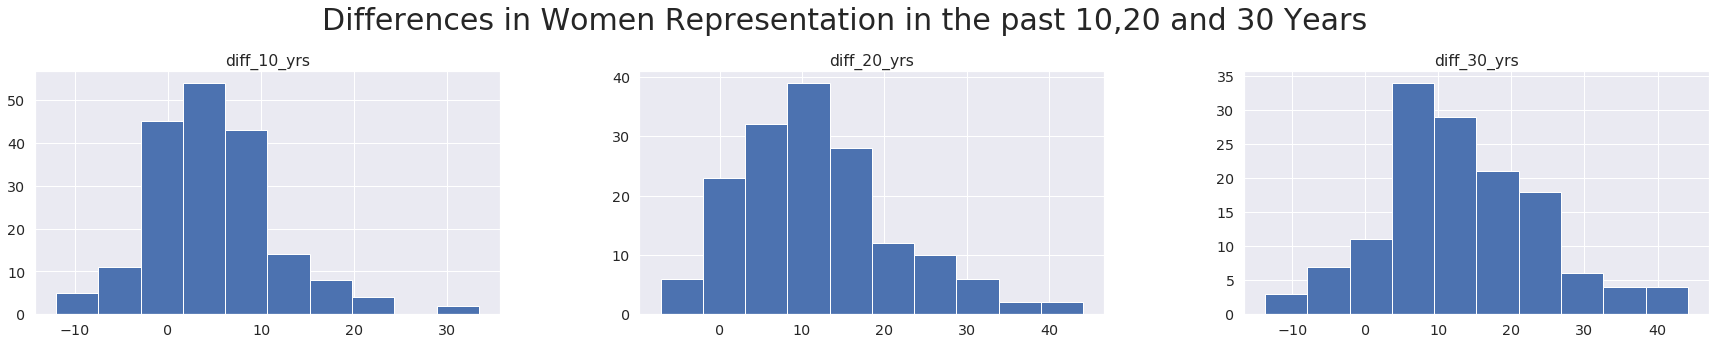

In [0]:
#countries_describe.drop(columns = ['count', '25%','50%','75%']).hist(figsize=(15,9))
#plt.savefig("Countries_Desc.jpg")


countries_series_and_desc[['diff_10_yrs','diff_20_yrs','diff_30_yrs']].hist(figsize=(30,5), layout = (1,3))
plt.suptitle("Differences in Women Representation in the past 10,20 and 30 Years", fontsize = 30)

plt.subplots_adjust(top=0.8)
plt.savefig('Differences_Hist.jpg')

In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Countries that made the biggest leap since 1990 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

top_diff_30 = pd.DataFrame(countries_series_and_desc.sort_values(by = 'diff_30_yrs', ascending = False).iloc[:10,-1])

top_diff_30['Country'] = top_diff_30.index
top_diff_30.iloc[1,1] = 'Bolivia'
top_diff_30.reset_index(drop = True)

,diff_30_yrs,Country
0,44.15,Rwanda
1,43.88,Bolivia
2,39.95,South Africa
3,39.25,Namibia
4,36.20,Mexico
5,35.11,Costa Rica
6,33.46,Ecuador
7,32.79,France
8,32.52,Argentina
9,31.64,Tunisia


In [0]:
countries_series_and_desc.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019,count,mean,std,min,25%,50%,75%,max,diff_10_yrs,diff_20_yrs,diff_30_yrs
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70,7.0,24.214286,9.047178,3.7,27.50,27.70,27.7,27.70,0.40,NaN,24.00
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29,9.0,19.810000,9.028976,5.2,16.40,20.70,27.9,29.29,12.89,24.09,0.49
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76,9.0,18.428889,13.143497,2.4,6.20,25.76,31.6,31.60,18.06,22.56,23.36
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14,8.0,30.342500,13.639968,7.1,27.65,32.12,36.6,50.00,-3.56,25.04,NaN
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00,9.0,28.433333,10.531738,14.5,15.50,30.50,36.8,38.60,-8.60,14.50,15.50


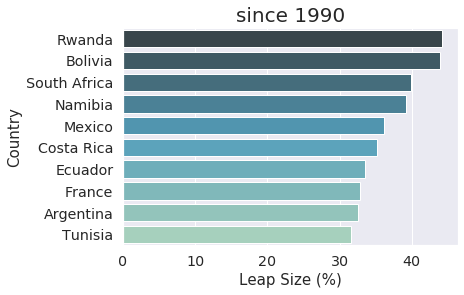

In [0]:


#a4_dims = (6, 5)
#fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.3)
ax = sns.barplot(x="diff_30_yrs", y="Country", data=top_diff_30 , palette = "GnBu_d")
ax.axes.set_title("since 1990",fontsize=20)
ax.set_ylabel("Country",fontsize=15)
ax.set_xlabel("Leap Size (%)",fontsize=15)
#ax.set_xticklabels(top_diff_30['Country'],rotation = 45, ha="right")

fig.savefig('Biggeat_Leap_Sine_2000_Horizontal.jpg')

In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Countries that made the biggest leap since 2000 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
top_diff_20 = pd.DataFrame(countries_series_and_desc.sort_values(by = 'diff_20_yrs', ascending = False).iloc[:10,-2])
top_diff_20['Country'] = top_diff_20.index
top_diff_20.iloc[1,1] = 'Bolivia'
top_diff_20.iloc[4,1] = 'Macedonia'
top_diff_20.reset_index(drop = True)

top_diff_20



,diff_20_yrs,Country
Country,,
Rwanda,44.15,Rwanda
Bolivia (Plurin. State of),41.58,Bolivia
Ethiopia,36.76,Ethiopia
Nicaragua,34.87,Nicaragua
North Macedonia,30.83,Macedonia
Burundi,30.36,Burundi
Belarus,30.05,Belarus
Mexico,30.00,Mexico
Senegal,29.72,Senegal


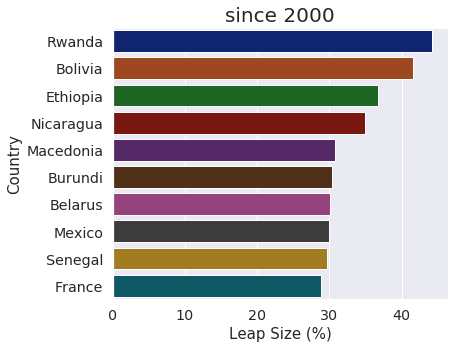

In [0]:
a4_dims = (6, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.3)
ax = sns.barplot(x="diff_20_yrs", y="Country", data=top_diff_20 , palette = "dark")
ax.axes.set_title("since 2000",fontsize=20)
ax.set_ylabel("Country",fontsize=15)
ax.set_xlabel("Leap Size (%)",fontsize=15)
#ax.set_xticklabels(top_diff_30['Country'],rotation = 45, ha="right")

fig.savefig('Biggeat_Leap_Sine_2000_Horizontal.jpg')

In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Countries that made the biggest leap since 2010 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
top_diff_10 = pd.DataFrame(countries_series_and_desc.sort_values(by = 'diff_10_yrs', ascending = False).iloc[:10,-3])
top_diff_10['Country'] = top_diff_10.index
top_diff_10.iloc[1,1] = 'Bolivia'
#top_diff_10.iloc[4,1] = 'Macedonia'
top_diff_10 = top_diff_10.reset_index(drop = True)

top_diff_10


,diff_10_yrs,Country
0,33.37,Grenada
1,30.78,Bolivia
2,23.87,Nicaragua
3,20.79,France
4,20.60,Mexico
5,19.87,Saudi Arabia
6,19.25,Namibia
7,19.12,Senegal
8,18.06,Algeria
9,17.46,Somalia


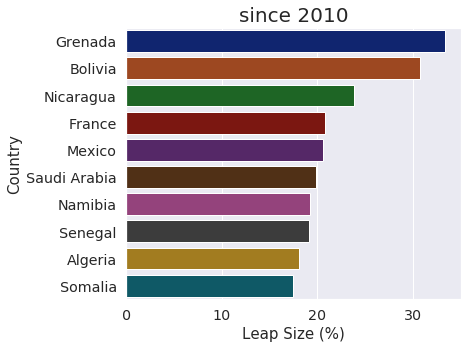

In [0]:
a4_dims = (6, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.3)
ax = sns.barplot(x="diff_10_yrs", y="Country", data=top_diff_10 , palette = "dark")
ax.axes.set_title("since 2010",fontsize=20)
ax.set_ylabel("Country",fontsize=15)
ax.set_xlabel("Leap Size (%)",fontsize=15)
#ax.set_xticklabels(top_diff_30['Country'],rotation = 45, ha="right")

fig.savefig('Biggeat_Leap_Sine_2010_Horizontal.jpg')

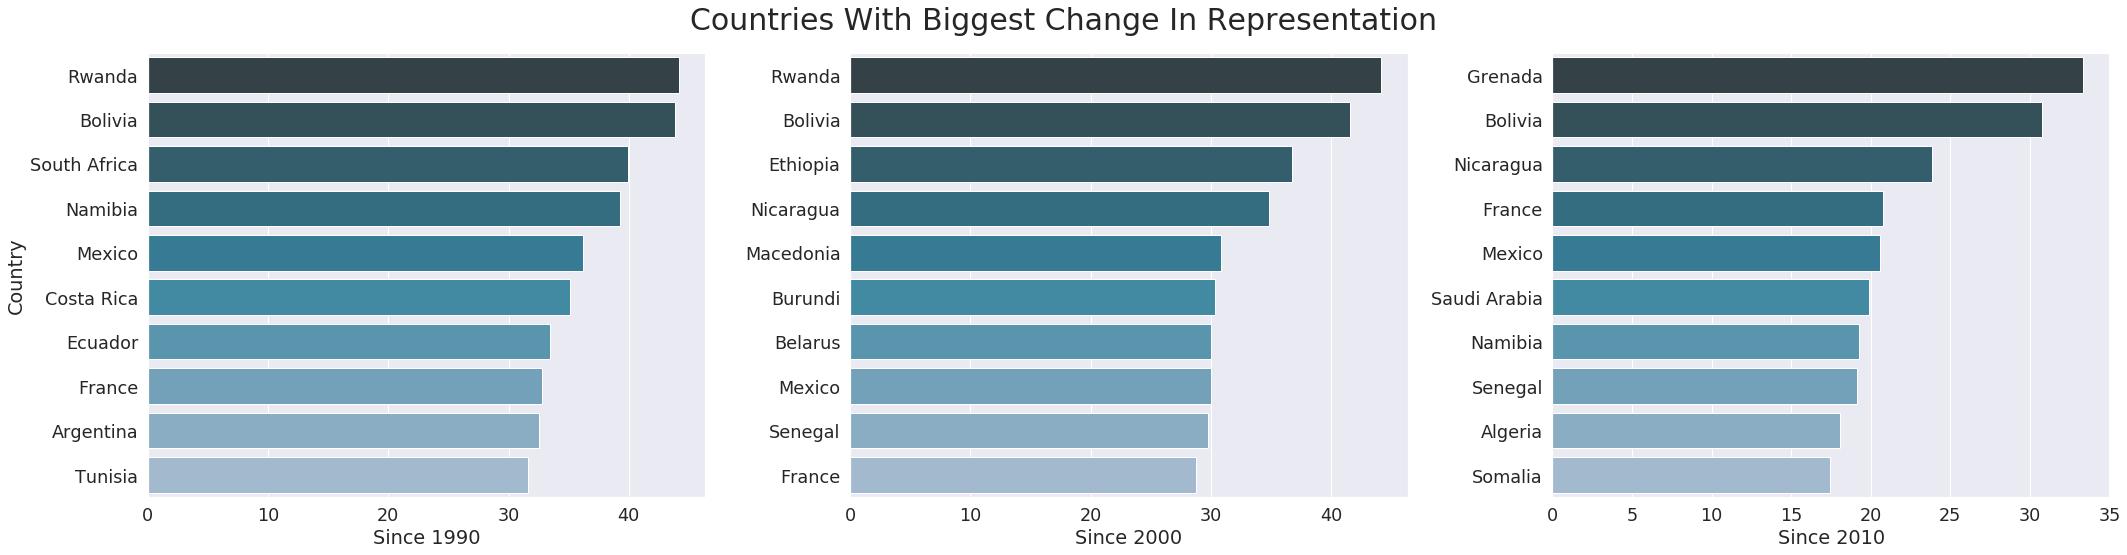

In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Placing all plots in one  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a4_dims = (30, 8)
f, axes = plt.subplots(1, 3, figsize=a4_dims)
sns.set(style = "darkgrid", font_scale=1.8)
#ax = sns.barplot(x="diff_10_yrs", y="Country", data=top_diff_10 , palette = "dark")

sns.barplot(x="diff_30_yrs", y="Country", data=top_diff_30 , palette = "PuBuGn_d", ax=axes[0])
axes[0].set_xlabel("Since 1990")
sns.barplot(x="diff_20_yrs", y="Country", data=top_diff_20 , palette = "PuBuGn_d", ax=axes[1])
axes[1].set_ylabel("",fontsize=15)
axes[1].set_xlabel("Since 2000")

sns.barplot(x="diff_10_yrs", y="Country", data=top_diff_10 , palette = "PuBuGn_d", ax=axes[2])
axes[2].set_ylabel("",fontsize=15)
axes[2].set_xlabel("Since 2010")

f.suptitle('Countries With Biggest Change In Representation', fontsize = 30)
f.tight_layout()
plt.subplots_adjust(top=0.9)
f.savefig('Biggeat_Leap_All_Years_Blue.jpg')

### Smallest Difference

In [0]:
countries_series_and_desc.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019,count,mean,std,min,25%,50%,75%,max,diff_10_yrs,diff_20_yrs,diff_30_yrs
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70,7.0,24.214286,9.047178,3.7,27.50,27.70,27.7,27.70,0.40,NaN,24.00
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29,9.0,19.810000,9.028976,5.2,16.40,20.70,27.9,29.29,12.89,24.09,0.49
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76,9.0,18.428889,13.143497,2.4,6.20,25.76,31.6,31.60,18.06,22.56,23.36
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14,8.0,30.342500,13.639968,7.1,27.65,32.12,36.6,50.00,-3.56,25.04,NaN
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00,9.0,28.433333,10.531738,14.5,15.50,30.50,36.8,38.60,-8.60,14.50,15.50


In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Countries that made the Smallest leap since 1990 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bot_diff_30 = pd.DataFrame(countries_series_and_desc.sort_values(by = 'diff_30_yrs', ascending = False).dropna().iloc[-10:,-1])
bot_diff_30['Country'] = bot_diff_30.index
bot_diff_30.iloc[4,1] = 'North Korea'
#top_diff_10.iloc[4,1] = 'Macedonia'
bot_diff_30 = bot_diff_30.reset_index(drop = True)

bot_diff_30

,diff_30_yrs,Country
0,-1.03,Tuvalu
1,-3.04,Congo
2,-3.77,Yemen
3,-4.30,Vanuatu
4,-4.80,North Korea
5,-5.02,Guyana
6,-7.79,Mongolia
7,-8.14,Hungary
8,-11.36,Armenia
9,-13.73,Romania


In [0]:
countries_series_and_desc

In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Countries that made the Smallest leap since 2000 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bot_diff_20 = pd.DataFrame(countries_series_and_desc.sort_values(by = 'diff_20_yrs', ascending = False).dropna().iloc[-10:,-2])
bot_diff_20['Country'] = bot_diff_20.index
bot_diff_20.iloc[8,1] = 'North Korea'
#top_diff_10.iloc[4,1] = 'Macedonia'
bot_diff_20 = bot_diff_20.reset_index(drop = True)

bot_diff_20

,diff_20_yrs,Country
0,0.03,Saint Kitts and Nevis
1,0.00,Vanuatu
2,-0.18,Thailand
3,-0.37,Yemen
4,-0.74,Congo
5,-1.80,Papua New Guinea
6,-2.18,Bahamas
7,-2.29,Seychelles
8,-3.80,North Korea
9,-4.67,Netherlands


In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Countries that made the Smallest leap since 2010 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bot_diff_10 = pd.DataFrame(countries_series_and_desc.sort_values(by = 'diff_10_yrs', ascending = False).dropna().iloc[-10:,-3])
bot_diff_10['Country'] = bot_diff_10.index
#bot_diff_30.iloc[4,1] = 'North Korea'
#top_diff_10.iloc[4,1] = 'Macedonia'
bot_diff_10 = bot_diff_10.reset_index(drop = True)

bot_diff_10

,diff_10_yrs,Country
0,-3.80,Vanuatu
1,-4.13,Malawi
2,-4.80,Iceland
3,-5.51,Mauritius
4,-6.35,Eswatini
5,-7.88,Thailand
6,-8.60,Angola
7,-8.66,Saint Vincent & Grenadines
8,-10.67,Netherlands
9,-12.00,Liechtenstein


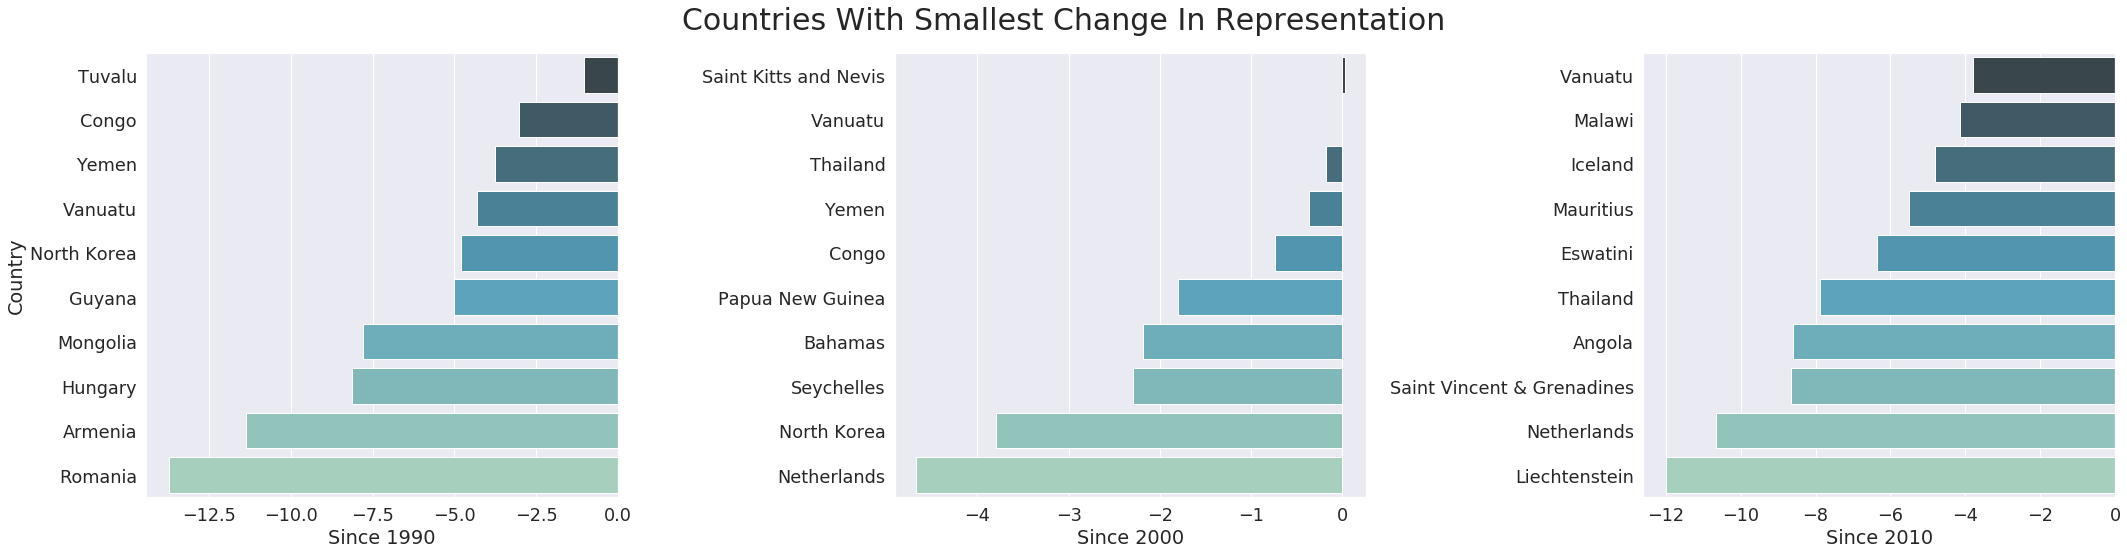

In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Placing all plots in one  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a4_dims = (30, 8)
f, axes = plt.subplots(1, 3, figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.8)
#ax = sns.barplot(x="diff_10_yrs", y="Country", data=top_diff_10 , palette = "dark")

sns.barplot(x="diff_30_yrs", y="Country", data=bot_diff_30 , palette = "GnBu_d", ax=axes[0])
axes[0].set_xlabel("Since 1990")
#axes[0].set_yticklabels(bot_diff_30['Country'],rotation = 45, ha="right")

sns.barplot(x="diff_20_yrs", y="Country", data=bot_diff_20 , palette = "GnBu_d", ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("Since 2000")
#axes[1].set_yticklabels(bot_diff_20['Country'],rotation = 45, ha="right")

sns.barplot(x="diff_10_yrs", y="Country", data=bot_diff_10 , palette = "GnBu_d", ax=axes[2])
axes[2].set_ylabel("")
axes[2].set_xlabel("Since 2010")
#axes[2].set_yticklabels(bot_diff_10['Country'],rotation = 45, ha="right")

f.suptitle("Countries With Smallest Change In Representation", fontsize = 30)
f.tight_layout()
plt.subplots_adjust(top=0.9)

f.savefig('Smallest_Leap_All_Years.jpg')

In [0]:
countries_series_and_desc.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019,count,mean,std,min,25%,50%,75%,max,diff_10_yrs,diff_20_yrs,diff_30_yrs
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70,7.0,24.214286,9.047178,3.7,27.50,27.70,27.7,27.70,0.40,NaN,24.00
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29,9.0,19.810000,9.028976,5.2,16.40,20.70,27.9,29.29,12.89,24.09,0.49
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76,9.0,18.428889,13.143497,2.4,6.20,25.76,31.6,31.60,18.06,22.56,23.36
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14,8.0,30.342500,13.639968,7.1,27.65,32.12,36.6,50.00,-3.56,25.04,NaN
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00,9.0,28.433333,10.531738,14.5,15.50,30.50,36.8,38.60,-8.60,14.50,15.50


## Countries with most and least women in Parliament



In [0]:
countries_series_and_desc.sort_values(by = ['2019'], ascending = False).head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019,count,mean,std,min,25%,50%,75%,max,diff_10_yrs,diff_20_yrs,diff_30_yrs
Country,,,,,,,,,,,,,,,,,,,,
Rwanda,17.1,17.1,48.8,56.3,63.8,63.8,61.3,61.3,61.25,9.0,50.083333,19.263664,17.1,48.8,61.25,61.3,63.80,4.95,44.15,44.15
Cuba,33.9,27.6,36.0,43.2,48.9,48.9,48.9,48.9,53.22,9.0,43.280000,8.746376,27.6,36.0,48.90,48.9,53.22,10.02,25.62,19.32
Bolivia (Plurin. State of),9.2,11.5,19.2,22.3,53.1,53.1,53.1,53.1,53.08,9.0,36.408889,20.150315,9.2,19.2,53.08,53.1,53.10,30.78,41.58,43.88
Mexico,12.0,18.2,22.6,27.6,38.0,42.4,42.6,42.6,48.20,9.0,32.688889,12.870552,12.0,22.6,38.00,42.6,48.20,20.60,30.00,36.20
Sweden,38.4,42.7,45.3,46.4,43.6,43.6,43.6,43.6,47.28,9.0,43.831111,2.540711,38.4,43.6,43.60,45.3,47.28,0.88,4.58,8.88


In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~         2019         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

top_10_2019 = pd.DataFrame(countries_series_and_desc.sort_values(by = ['2019'], ascending = False).iloc[:10,8])

top_10_2019['Country'] = top_10_2019.index
top_10_2019.iloc[2,1] = 'Bolivia'
top_10_2019 = top_10_2019.reset_index(drop = True)
top_10_2019

,2019,Country
0,61.25,Rwanda
1,53.22,Cuba
2,53.08,Bolivia
3,48.20,Mexico
4,47.28,Sweden
5,46.67,Grenada
6,46.15,Namibia
7,45.61,Costa Rica
8,44.57,Nicaragua
9,42.75,South Africa


In [0]:
bot_10_2019 = pd.DataFrame(countries_series_and_desc.sort_values(by = ['2019'], ascending = False).dropna().iloc[-10:,8])

bot_10_2019['Country'] = bot_10_2019.index
bot_10_2019.iloc[2,1] = 'Iran'
bot_10_2019 = bot_10_2019.reset_index(drop = True)
bot_10_2019

,2019,Country
0,6.67,Tuvalu
1,6.52,Kiribati
2,5.88,Iran
3,5.42,Thailand
4,5.33,Sri Lanka
5,4.69,Lebanon
6,2.04,Solomon Islands
7,0.33,Yemen
8,0.00,Vanuatu
9,0.00,Papua New Guinea


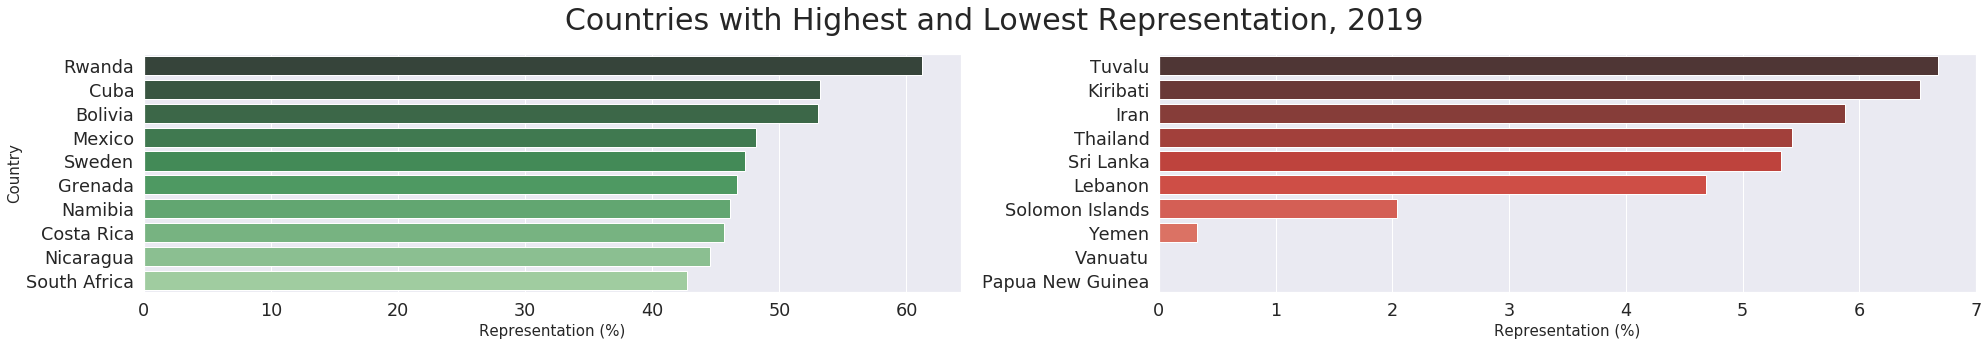

In [0]:
a4_dims = (28, 5)
f, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.6)
#ax = sns.barplot(x="diff_10_yrs", y="Country", data=top_diff_10 , palette = "dark")

sns.barplot(x="2019", y="Country", data=top_10_2019 , palette = "Greens_d", ax=axes[0])
#axes[0].set_title("Top Countries 2019",fontsize=20)
axes[0].set_ylabel("Country",fontsize=15)
axes[0].set_xlabel("Representation (%)",fontsize=15)

sns.barplot(x="2019", y="Country", data=bot_10_2019 , palette = "Reds_d", ax=axes[1])
axes[1].set_ylabel("",fontsize=15)
axes[1].set_xlabel("Representation (%)",fontsize=15)

f.suptitle("Countries with Highest and Lowest Representation, 2019", fontsize = 30)
f.tight_layout()
plt.subplots_adjust(top=0.85)
f.savefig('Top_And_Bot_2019.jpg')

In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~         2010         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
top_10_2010 = pd.DataFrame(countries_series_and_desc.sort_values(by = ['2010'], ascending = False).iloc[:10,3])
top_10_2010['Country'] = top_10_2010.index
top_10_2010 = top_10_2010.reset_index(drop = True)
top_10_2010

,2010,Country
0,56.3,Rwanda
1,46.4,Sweden
2,44.5,South Africa
3,43.2,Cuba
4,42.9,Iceland
5,42.0,Netherlands
6,40.0,Finland
7,39.6,Norway
8,39.2,Mozambique
9,38.6,Angola


In [0]:
bot_10_2010 = pd.DataFrame(countries_series_and_desc.sort_values(by = ['2010'], ascending = False).dropna().iloc[-10:,3])
bot_10_2010['Country'] = bot_10_2010.index
bot_10_2010.iloc[3,1] = 'Iran'
bot_10_2010 = bot_10_2010.reset_index(drop = True)
bot_10_2010

,2010,Country
0,3.9,Mongolia
1,3.8,Vanuatu
2,3.1,Lebanon
3,2.8,Iran
4,0.9,Papua New Guinea
5,0.3,Yemen
6,0.0,Nauru
7,0.0,Belize
8,0.0,Solomon Islands
9,0.0,Tuvalu


In [0]:
countries_series_and_desc.to_csv('countries_series_and_desc.csv')

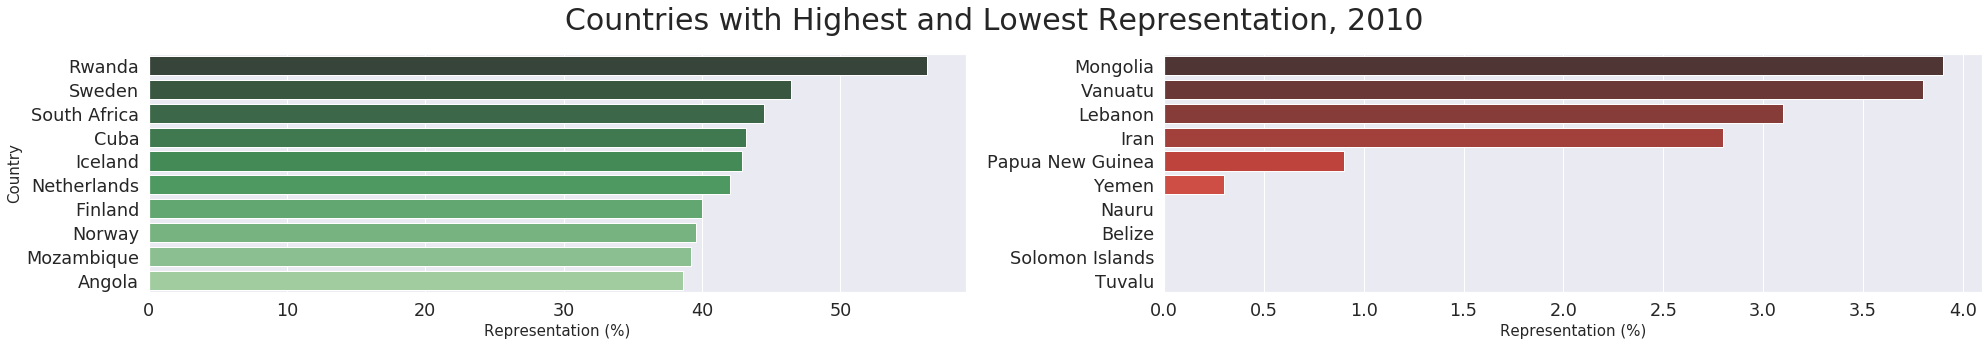

In [0]:
a4_dims = (28, 5)
f, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.6)
#ax = sns.barplot(x="diff_10_yrs", y="Country", data=top_diff_10 , palette = "dark")

sns.barplot(x="2010", y="Country", data=top_10_2010 , palette = "Greens_d", ax=axes[0])
#axes[0].set_title("Top Countries 2010",fontsize=20)
axes[0].set_ylabel("Country",fontsize=15)
axes[0].set_xlabel("Representation (%)",fontsize=15)

sns.barplot(x="2010", y="Country", data=bot_10_2010 , palette = "Reds_d", ax=axes[1])
axes[1].set_ylabel("",fontsize=15)
axes[1].set_xlabel("Representation (%)",fontsize=15)

f.suptitle("Countries with Highest and Lowest Representation, 2010", fontsize = 30)
f.tight_layout()
plt.subplots_adjust(top=0.85)

f.savefig('Top_And_Bot_2010.jpg')


In [0]:
countries_series_and_desc.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019,count,mean,std,min,25%,50%,75%,max,diff_10_yrs,diff_20_yrs,diff_30_yrs
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70,7.0,24.214286,9.047178,3.7,27.50,27.70,27.7,27.70,0.40,NaN,24.00
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29,9.0,19.810000,9.028976,5.2,16.40,20.70,27.9,29.29,12.89,24.09,0.49
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76,9.0,18.428889,13.143497,2.4,6.20,25.76,31.6,31.60,18.06,22.56,23.36
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14,8.0,30.342500,13.639968,7.1,27.65,32.12,36.6,50.00,-3.56,25.04,NaN
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00,9.0,28.433333,10.531738,14.5,15.50,30.50,36.8,38.60,-8.60,14.50,15.50


In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~         2000         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

top_10_2000 = pd.DataFrame(countries_series_and_desc.sort_values(by = ['2000'], ascending = False).iloc[:10,1])
top_10_2000['Country'] = top_10_2000.index
top_10_2000 = top_10_2000.reset_index(drop = True)
top_10_2000


,2000,Country
0,42.7,Sweden
1,37.4,Denmark
2,37.0,Finland
3,36.4,Norway
4,36.0,Netherlands
5,34.9,Iceland
6,30.9,Germany
7,30.0,South Africa
8,29.2,New Zealand
9,28.6,Bosnia and Herzegovina


In [0]:
bot_10_2000 = pd.DataFrame(countries_series_and_desc.sort_values(by = ['2000'], ascending = False).dropna().iloc[-10:,1])
bot_10_2000['Country'] = bot_10_2000.index
bot_10_2000 = bot_10_2000.reset_index(drop = True)

bot_10_2000

,2000,Country
0,1.8,Papua New Guinea
1,1.2,Niger
2,0.7,Yemen
3,0.6,Morocco
4,0.0,Tuvalu
5,0.0,Jordan
6,0.0,United Arab Emirates
7,0.0,Djibouti
8,0.0,Vanuatu
9,0.0,Nauru


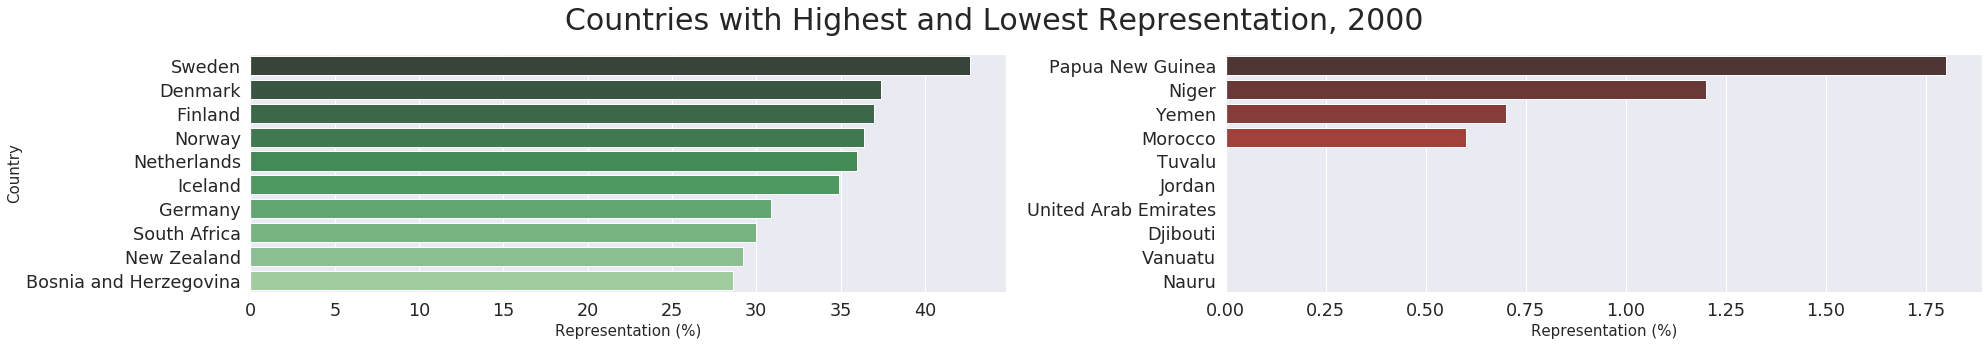

In [0]:
a4_dims = (28, 5)
f, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.6)
#ax = sns.barplot(x="diff_10_yrs", y="Country", data=top_diff_10 , palette = "dark")

sns.barplot(x="2000", y="Country", data=top_10_2000 , palette = "Greens_d", ax=axes[0])
#axes[0].set_title("Top Countries 2000",fontsize=20)
axes[0].set_ylabel("Country",fontsize=15)
axes[0].set_xlabel("Representation (%)",fontsize=15)

sns.barplot(x="2000", y="Country", data=bot_10_2000 , palette = "Reds_d", ax=axes[1])
axes[1].set_ylabel("",fontsize=15)
axes[1].set_xlabel("Representation (%)",fontsize=15)

f.suptitle("Countries with Highest and Lowest Representation, 2000", fontsize = 30)
f.tight_layout()
plt.subplots_adjust(top=0.85)

f.savefig('Top_And_Bot_2000.jpg')


In [0]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~         1990         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

top_10_1990 = pd.DataFrame(countries_series_and_desc.sort_values(by = ['1990'], ascending = False).iloc[:10,0])
top_10_1990['Country'] = top_10_1990.index
top_10_1990 = top_10_1990.reset_index(drop = True)
top_10_1990

,1990,Country
0,38.4,Sweden
1,36.9,Guyana
2,35.8,Norway
3,35.6,Armenia
4,34.4,Romania
5,33.9,Cuba
6,31.5,Finland
7,30.7,Denmark
8,28.8,Albania
9,26.0,Turkmenistan


In [0]:
bot_10_1990 = pd.DataFrame(countries_series_and_desc.sort_values(by = ['1990'], ascending = False).dropna().iloc[-10:,0])
bot_10_1990['Country'] = bot_10_1990.index
bot_10_1990 = bot_10_1990.reset_index(drop = True)

bot_10_1990


,1990,Country
0,0.0,Solomon Islands
1,0.0,Papua New Guinea
2,0.0,Belize
3,0.0,Morocco
4,0.0,Kiribati
5,0.0,Saint Lucia
6,0.0,United Arab Emirates
7,0.0,Djibouti
8,0.0,Jordan
9,0.0,Samoa


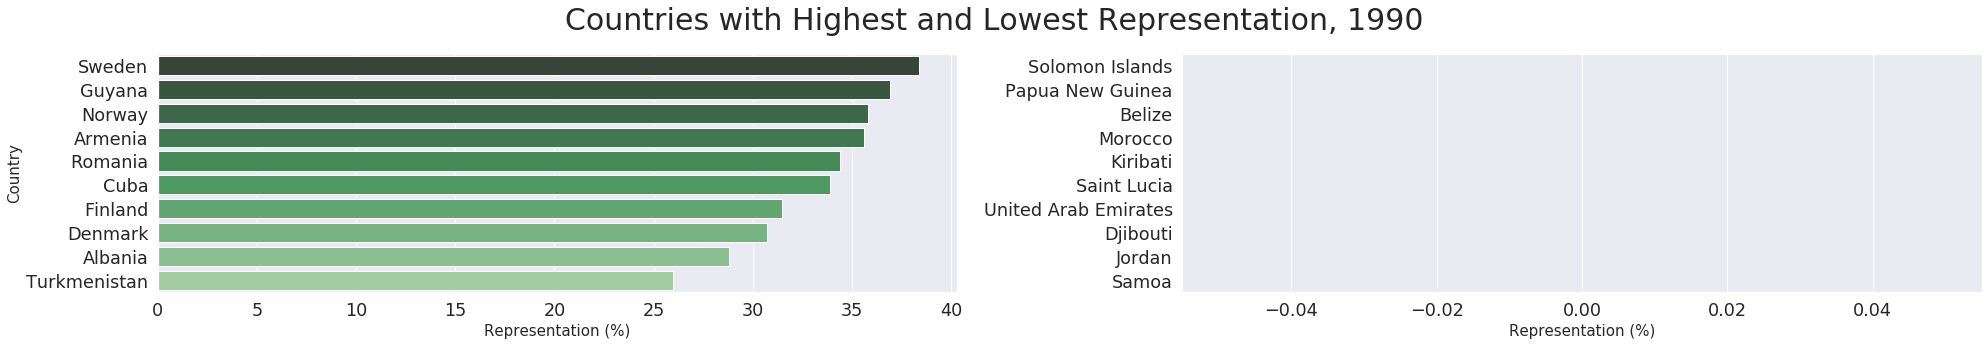

In [0]:
a4_dims = (28, 5)
f, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.set(style = "darkgrid", font_scale=1.6)
#ax = sns.barplot(x="diff_10_yrs", y="Country", data=top_diff_10 , palette = "dark")

sns.barplot(x="1990", y="Country", data=top_10_1990 , palette = "Greens_d", ax=axes[0])
#axes[0].set_title("Top Countries 1990",fontsize=20)
axes[0].set_ylabel("Country",fontsize=15)
axes[0].set_xlabel("Representation (%)",fontsize=15)

sns.barplot(x="1990", y="Country", data=bot_10_1990 , palette = "Reds_d", ax=axes[1])
axes[1].set_ylabel("",fontsize=15)
axes[1].set_xlabel("Representation (%)",fontsize=15)

f.suptitle("Countries with Highest and Lowest Representation, 1990", fontsize = 30)
f.tight_layout()
plt.subplots_adjust(top=0.85)

f.savefig('Top_And_Bot_1990.jpg')


# Heat map of the world


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:

link_codes = 'https://drive.google.com/open?id=19ZVjGfrsFOF8tkFpNRcx54_pVQ3OptSd'

fluff, id = link_codes.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Countries_Codes.csv')  
codes = pd.read_csv('Countries_Codes.csv', engine = 'python')

19ZVjGfrsFOF8tkFpNRcx54_pVQ3OptSd


In [0]:
codes

,COUNTRY,CODE
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


In [0]:
countries_series_and_desc['Country'] = countries_series_and_desc.index
countries_series_and_desc.head()

,1990,2000,2005,2010,2015,2016,2017,2018,2019,count,mean,std,min,25%,50%,75%,max,diff_10_yrs,diff_20_yrs,diff_30_yrs,Country
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.7,NaN,NaN,27.3,27.7,27.7,27.7,27.7,27.70,7.0,24.214286,9.047178,3.7,27.50,27.70,27.7,27.70,0.40,NaN,24.00,Afghanistan
Albania,28.8,5.2,6.4,16.4,20.7,20.7,22.9,27.9,29.29,9.0,19.810000,9.028976,5.2,16.40,20.70,27.9,29.29,12.89,24.09,0.49,Albania
Algeria,2.4,3.2,6.2,7.7,31.6,31.6,31.6,25.8,25.76,9.0,18.428889,13.143497,2.4,6.20,25.76,31.6,31.60,18.06,22.56,23.36,Algeria
Andorra,NaN,7.1,14.3,35.7,50.0,39.3,32.1,32.1,32.14,8.0,30.342500,13.639968,7.1,27.65,32.12,36.6,50.00,-3.56,25.04,NaN,Andorra
Angola,14.5,15.5,15.0,38.6,36.8,36.8,38.2,30.5,30.00,9.0,28.433333,10.531738,14.5,15.50,30.50,36.8,38.60,-8.60,14.50,15.50,Angola


In [0]:
countries_and_codes_2019 = countries_series_and_desc[['Country','2019']].reset_index(drop=True)
countries_and_codes_2019.head()

,Country,2019
0,Afghanistan,27.70
1,Albania,29.29
2,Algeria,25.76
3,Andorra,32.14
4,Angola,30.00


In [0]:
codes.columns = ['Country', 'Code']
codes.head()

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [0]:
countries_and_codes_2019 = countries_and_codes_2019.reset_index(drop=True).merge(codes, how ='left', left_on='Country', right_on = 'Country')



In [0]:
countries_and_codes_2019

,Country,2019,Code
0,Afghanistan,NaN,AFG
1,Albania,29.29,ALB
2,Algeria,25.76,DZA
3,Andorra,32.14,AND
4,Angola,30.00,AGO
...,...,...,...
190,Venezuela (Boliv. Rep. of),22.16,NaN
191,Viet Nam,26.72,NaN
192,Yemen,0.33,YEM
193,Zambia,17.96,ZMB


In [0]:
countries_and_codes_2019.head()

,Country,2019,Code
0,Afghanistan,NaN,AFG
1,Albania,29.29,ALB
2,Algeria,25.76,DZA
3,Andorra,32.14,AND
4,Angola,30.00,AGO


In [0]:
df = countries_and_codes_2019
df.head()

,Country,2019,Code
0,Afghanistan,NaN,AFG
1,Albania,29.29,ALB
2,Algeria,25.76,DZA
3,Andorra,32.14,AND
4,Angola,30.00,AGO


195

In [0]:
fig = go.Figure(data=go.Choropleth(
    locations = df['Code'],
    z = df['2019'],
    text = df['Country'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Women in Parliament<br>Percentatge',
))

fig.update_layout(
    title_text='2019 Global Percentage of Women in Parliament',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.99,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://data.un.org/Data.aspx?q=parliamentary&d=GenderStat&f=inID%3a125">\
            Women in Parliament</a>',
        showarrow = False
    )]
)

fig.show()

In [0]:
df.head()

,Country,2019,Code
0,Afghanistan,NaN,AFG
1,Albania,29.29,ALB
2,Algeria,25.76,DZA
3,Andorra,32.14,AND
4,Angola,30.00,AGO


In [0]:
 df.isnull().sum()

Country     0
2019        2
Code       27
dtype: int64

After plotting the map above and counting the amount of codes I had missing after the merge I did 2 things:
1. Completed the NaN values of 2019 (the code for that is in the first part of the notebook).
2. Manually completed the codes I didn't have, for example - Russia was named differently in the UN dataset and in the codes list and it was the case for most other countries so I simply completed those manually.

## Loading the data to plot after manually filling the missing gaps

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link_codes = 'https://drive.google.com/open?id=1TAI-rmc0HYYaqiCGBlZ4uzuOLNIqLtGW'

In [0]:
fluff, id = link_codes.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Countries_And_Codes_2019_Complete.csv')  
df = pd.read_csv('Countries_And_Codes_2019_Complete.csv', engine = 'python')

1TAI-rmc0HYYaqiCGBlZ4uzuOLNIqLtGW


In [2]:
fig = go.Figure(data=go.Choropleth(
    locations = df['Code'],
    z = df['2019'],
    text = df['Country'],
    colorscale = 'Purples',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Women in Parliament<br>Percentatge',
))

fig.update_layout(
    title_text='2019 Global Percentage of Women in Parliament',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.99,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://data.un.org/Data.aspx?q=parliamentary&d=GenderStat&f=inID%3a125">\
            Women in Parliament</a>',
        showarrow = False
    )]
)

fig.show()

#plot(fig, validate=False, filename='d3-world-map.html', image='png')

NameError: ignored